# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


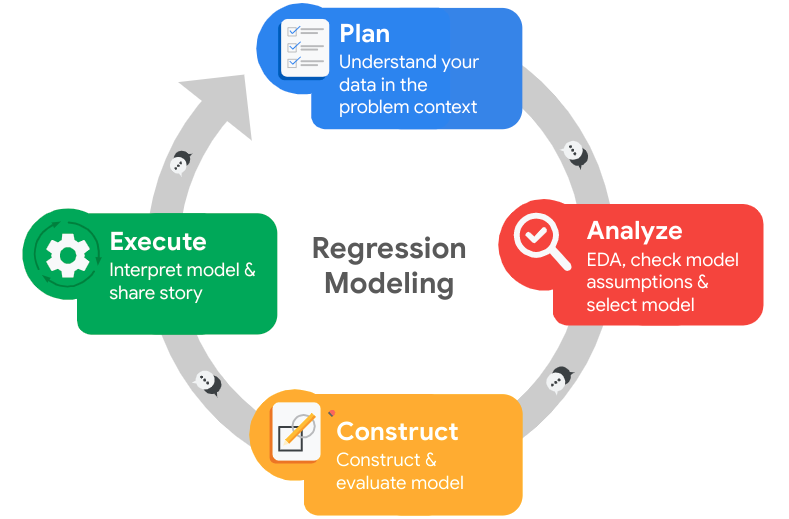

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1.My main stakeholders in this project are the Human Resources (HR) department. In addition, as part of the Salifort Motors data team, I also have stakeholders in the team, which could be a senior data scientist or the data team manager. Both of them are my interlocutors in the project with different interests, so they will have to communicate about the project in different parts throughout the whole process. 

2.The main objective of this project is to answer the following question: What are the reasons why our employees leave the company? Answering this question will allow us firstly to identify which employees are most at risk of leaving the company and at the same time to develop strategies to prevent them from leaving.

3.According to the columns and description of the data provided by the HR department. I have useful data for this project. Some columns provide information about the company's employees, such as the department they work in, how long they have been with the company, the time of the last promotion in the last 5 years and the salary, I also have information about the level of satisfaction, the working hours per month and their last appraisal. The latter would be good estimators to identify and predict which employees could potentially leave the company. In addition, the dataset has other columns such as accidents at work that indicate the risk during work.

5.Finally, before starting the EDA process I have to remove any personal information from the dataset, such as first name, last name, address and any information that can identify a particular employee. For ethical reasons, it is important that all employees are anonymised throughout the process to avoid any bias, especially during model building. In addition, I have to protect this information and not disclose any progress or information to outsiders and project stakeholders.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
##### PACKAGES #######
# Principal packages
import numpy as np
import pandas as pd
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical packages
import scipy.stats as stats

# Modeling Packages
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

#### Additonal Features #########
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
 # Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
print("Dataframe dimesion:",df.shape)
df.head(10)


Dataframe dimesion: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

print("Departments: ",np.unique(df["Department"]))
print("Levels of Salaries: ",np.unique(df["salary"]))
df.describe()

Departments:  ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
Levels of Salaries:  ['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
print("Proportion of employees left: ",(df.groupby("left")["satisfaction_level"].agg("count")/14999)*100)

df.info()

Proportion of employees left:  left
0    76.191746
1    23.808254
Name: satisfaction_level, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df.rename(columns={"average_montly_hours":"monthly_hours","time_spend_company":"years_in_the_company",
                   "promotion_last_5years":"promotion_last_5yrs","Department":"department"}, inplace=True)

# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'monthly_hours', 'years_in_the_company', 'Work_accident', 'left',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Drop duplicates values
df_out_dup=df.drop_duplicates(keep="first")
df_out_dup.shape

(11991, 10)

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df_dupl=df[df.duplicated(keep="first")]
df_dupl.shape

(3008, 10)

In [9]:
# Inspect some rows containing duplicates as needed
df_dupl.head(10)


,satisfaction_level,last_evaluation,number_project,monthly_hours,years_in_the_company,Work_accident,left,promotion_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean=df.drop_duplicates(keep="first")


# Display first few rows of new dataframe as needed
print("Final_dataset_size: ",df_clean.shape)
df_clean.head()


Final_dataset_size:  (11991, 10)


,satisfaction_level,last_evaluation,number_project,monthly_hours,years_in_the_company,Work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

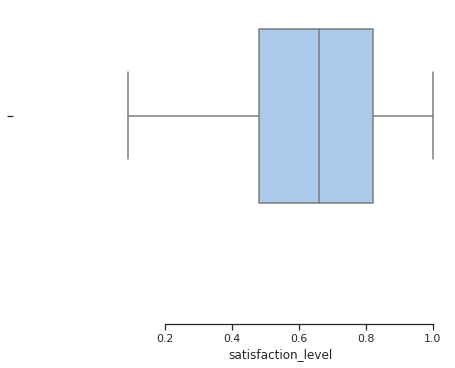

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=df_clean["satisfaction_level"])
sns.despine(offset=100, trim=True)


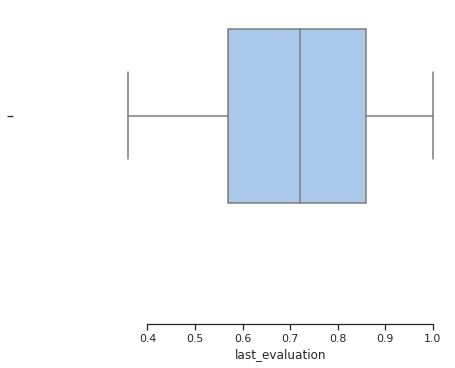

In [12]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=df_clean["last_evaluation"])
sns.despine(offset=100, trim=True)

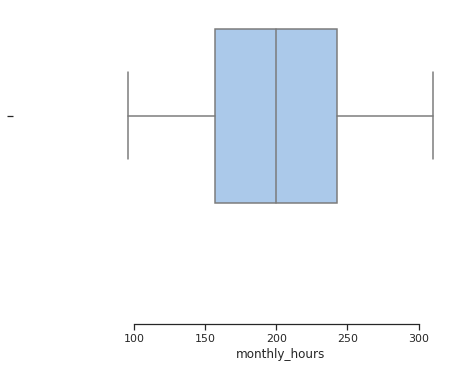

In [13]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=df_clean["monthly_hours"])
sns.despine(offset=100, trim=True)

In [14]:

def count_outlier(data,column):
    q25=data[column].quantile(q=0.25)
    q75=data[column].quantile(q=0.75)
    limit_up=(data[column].mean()+((q75-q25)*1.5))
    limit_low=(data[column].mean()-((q75-q25)*1.5))
    out_up=data[data[column]>(limit_up)]
    out_low=data[data[column]<(limit_low)]
    return(len(out_up),len(out_low))

# Determine the number of rows containing outliers
columns=["monthly_hours","satisfaction_level","last_evaluation"]
print("Outliers in numeric variables")
for column in columns:
    print("Variable" ,column)
    print("High outliers and low outliers: ", count_outlier(df_clean,column))



Outliers in numeric variables
Variable monthly_hours
High outliers and low outliers:  (0, 0)
Variable satisfaction_level
High outliers and low outliers:  (0, 501)
Variable last_evaluation
High outliers and low outliers:  (0, 0)


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




At first glance, there does not seem to be a clear relationship between the numerical variables, as their distribution is not linear when compared. On the other hand, it was observed that the vast majority of employees who left the company had a lower level of satisfaction than those who stayed on. This initial observation may suggest that there are some factors that demotivate employees and lead them to leave their jobs.
In order to determine whether the problem of job disengagement was general or mainly affected some departments of the company, the distribution of the level of job disengagement was plotted. The distribution of satisfaction level, monthly hours and performance level of the employees who left and stayed with the company was plotted. None of the graphs, with the exception of satisfaction, showed any visually significant change. This indicates that the phenomenon of employee turnover is a phenomenon that affects all departments equally. The same procedure was performed comparing salaries, and the same results were obtained for low and medium salaries, indicating that this phenomenon has the same occurrence at these levels. However, it is also worth mentioning that the sample of high paid employees is low, so these results may be due to the size of the sample rather than a real trend. 
Lastly, several transformations of the data were carried out.
The transformed variables included monthly working hours, which were classified according to how many people work more hours than stipulated by law (8 hours per day, in a 6-day working day), resulting in a total working time of 48 hours per week. With this new classification, a new variable was created that classifies employees with possible burnout as those who work more hours than the stipulated hours and have a low performance or satisfaction level. Other variables were also created to classify employees as potential talents: potential talents were defined as very high performers.
This exploratory analysis allowed us to clean the data, generate new variables and identify potential variables for future model building, which allowed us to have a better understanding of the data.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print("Proportion of employees left: ",(df_clean.groupby("left")["satisfaction_level"].agg("count")))


# Get percentages of people who left vs. stayed
print("Percentage of employees left: ",(df_clean.groupby("left")["satisfaction_level"].agg("count")/11991)*100)



Proportion of employees left:  left
0    10000
1     1991
Name: satisfaction_level, dtype: int64
Percentage of employees left:  left
0    83.39588
1    16.60412
Name: satisfaction_level, dtype: float64


In [16]:
# Get numbers of people who have a work accident
print("Proportion of employees with work accidents: ",
      (df_clean.groupby("Work_accident")["satisfaction_level"].agg("count")))

# Get percentage of people who have a work accident
print("Proportion of employees with work accidents: ",
      (df_clean.groupby("Work_accident")["satisfaction_level"].agg("count")/11991)*100)


Proportion of employees with work accidents:  Work_accident
0    10141
1     1850
Name: satisfaction_level, dtype: int64
Proportion of employees with work accidents:  Work_accident
0    84.571762
1    15.428238
Name: satisfaction_level, dtype: float64


In [17]:
# Get numbers of people who have a work accident
print("Proportion of employees promoted the last five years: ",
      (df_clean.groupby("promotion_last_5yrs")["satisfaction_level"].agg("count")))

# Get percentage of people who have a work accident
print("Proportion of employees last five years: ",
      (df_clean.groupby("promotion_last_5yrs")["satisfaction_level"].agg("count")/11991)*100)


Proportion of employees promoted the last five years:  promotion_last_5yrs
0    11788
1      203
Name: satisfaction_level, dtype: int64
Proportion of employees last five years:  promotion_last_5yrs
0    98.307064
1     1.692936
Name: satisfaction_level, dtype: float64


In [18]:
print("Proportion of employees promoted the last five years: ",
      (df_clean.groupby("department")["satisfaction_level"].agg("count")))

# Get percentage of people who have a work accident
print("Percentage of employees last five years: ",
      (df_clean.groupby("department")["satisfaction_level"].agg("count")/11991)*100)


Proportion of employees promoted the last five years:  department
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: satisfaction_level, dtype: int64
Percentage of employees last five years:  department
IT              8.139438
RandD           5.787674
accounting      5.178884
hr              5.012092
management      3.636060
marketing       5.612543
product_mng     5.720957
sales          27.011926
support        15.186390
technical      18.714036
Name: satisfaction_level, dtype: float64


In [19]:
print("Proportion of employees promoted the last five years: ",
      (df_clean.groupby("salary")["satisfaction_level"].agg("count")))

# Get percentage of people who have a work accident
print("Percentage of employees last five years: ",
      (df_clean.groupby("salary")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees promoted the last five years:  salary
high       990
low       5740
medium    5261
Name: satisfaction_level, dtype: int64
Percentage of employees last five years:  salary
high       8.256192
low       47.869235
medium    43.874573
Name: satisfaction_level, dtype: float64


In [20]:
employ_left=df_clean[df_clean["left"]==1]
print("Proportion of employees last five years: ",
       employ_left.groupby(["left","department"])["left"].agg("count"))

print("Percentage of employees last five years: ",
       (employ_left.groupby(["left","department"])["left"].agg("count")/1991)*100)



Proportion of employees last five years:  left  department 
1     IT             158
      RandD           85
      accounting     109
      hr             113
      management      52
      marketing      112
      product_mng    110
      sales          550
      support        312
      technical      390
Name: left, dtype: int64
Percentage of employees last five years:  left  department 
1     IT              7.935711
      RandD           4.269211
      accounting      5.474636
      hr              5.675540
      management      2.611753
      marketing       5.625314
      product_mng     5.524862
      sales          27.624309
      support        15.670517
      technical      19.588147
Name: left, dtype: float64


In [21]:
#Create a new column to check if the employees are overworking with monthly hours
df_clean["Overworking"]=np.where(df_clean["monthly_hours"]>(48*(30/7)),1,0)
print("Proportion of employees who need an incentive: ",
      (df_clean.groupby("Overworking")["satisfaction_level"].agg("count")))

print("Percentage of employees who need an incentive: ",
      (df_clean.groupby("Overworking")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees who need an incentive:  Overworking
0    6387
1    5604
Name: satisfaction_level, dtype: int64
Percentage of employees who need an incentive:  Overworking
0    53.264949
1    46.735051
Name: satisfaction_level, dtype: float64


In [22]:
df_clean["Burn_Out"]=np.where(
    (df_clean["Overworking"]==1)&((df_clean["last_evaluation"]<0.4)|(df_clean["satisfaction_level"]<0.4)),1,0)
print("Proportion of employees who probably have a Burn_Out: ",
      (df_clean.groupby("Burn_Out")["satisfaction_level"].agg("count")))

print("Percentage of employees who probably have a Burn_Out: ",
      (df_clean.groupby("Burn_Out")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees who probably have a Burn_Out:  Burn_Out
0    10930
1     1061
Name: satisfaction_level, dtype: int64
Percentage of employees who probably have a Burn_Out:  Burn_Out
0    91.151697
1     8.848303
Name: satisfaction_level, dtype: float64


In [23]:
#Create a new column to identify employees with low salary and more than five years
df_clean["raise_candidate"]=np.where((df_clean["last_evaluation"]>0.79)&(df_clean["salary"]=="low"),1,0)

print("Proportion of employees who need a raise: ",
      (df_clean.groupby("raise_candidate")["satisfaction_level"].agg("count")))

print("Percentage of employees who need a raise: ",
      (df_clean.groupby("raise_candidate")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees who need a raise:  raise_candidate
0    9785
1    2206
Name: satisfaction_level, dtype: int64
Percentage of employees who need a raise:  raise_candidate
0    81.602869
1    18.397131
Name: satisfaction_level, dtype: float64


In [24]:
df_clean["Stars_employees"]=np.where(
    (df_clean["last_evaluation"]>0.79)&(df_clean["Overworking"]==1),1,0)
print("Proportion of employees who need an incentive: ",
      (df_clean.groupby("Stars_employees")["satisfaction_level"].agg("count")))

print("Percentage of employees who need an incentive: ",
      (df_clean.groupby("Stars_employees")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees who need an incentive:  Stars_employees
0    9355
1    2636
Name: satisfaction_level, dtype: int64
Percentage of employees who need an incentive:  Stars_employees
0    78.016846
1    21.983154
Name: satisfaction_level, dtype: float64


In [25]:
#Create a new column to identify employees with more than five years without promotion or have low salary
df_clean["grow_oportunity_candidate"]=np.where(
    (df_clean["last_evaluation"]>0.79)&((df_clean["salary"]=="low")|(df_clean["promotion_last_5yrs"]==0)),1,0)

print("Proportion of employees who need an incentive: ",
      (df_clean.groupby("grow_oportunity_candidate")["satisfaction_level"].agg("count")))

print("Percentage of employees who need an incentive: ",
      (df_clean.groupby("grow_oportunity_candidate")["satisfaction_level"].agg("count")/11991)*100)

Proportion of employees who need an incentive:  grow_oportunity_candidate
0    7558
1    4433
Name: satisfaction_level, dtype: int64
Percentage of employees who need an incentive:  grow_oportunity_candidate
0    63.030606
1    36.969394
Name: satisfaction_level, dtype: float64


In [26]:
df_clean["left_after_accident"]=np.where(
    (df_clean["Work_accident"]==1)&(df_clean["left"]==1),1,0)
    
print("Proportion of employees who leave after an accident: ",
      (df_clean.groupby("left_after_accident")["satisfaction_level"].agg("count")))

print("Percentage of employees who leave after an accident: ",
      (df_clean.groupby("left_after_accident")["satisfaction_level"].agg("count")/11991)*100)

print("Proportion of employees who have an accident leave after an accident: ",
      df_clean[df_clean["Work_accident"]==1].groupby("left_after_accident")["satisfaction_level"].agg("count"))
      
print("Percentage of employees have an accident leave after an accident: ",
      (df_clean[df_clean["Work_accident"]==1].groupby("left_after_accident")["satisfaction_level"].agg("count")/1850)*100)

df_clean=df_clean.drop("left_after_accident",axis=1)

Proportion of employees who leave after an accident:  left_after_accident
0    11886
1      105
Name: satisfaction_level, dtype: int64
Percentage of employees who leave after an accident:  left_after_accident
0    99.124343
1     0.875657
Name: satisfaction_level, dtype: float64
Proportion of employees who have an accident leave after an accident:  left_after_accident
0    1745
1     105
Name: satisfaction_level, dtype: int64
Percentage of employees have an accident leave after an accident:  left_after_accident
0    94.324324
1     5.675676
Name: satisfaction_level, dtype: float64


In [27]:
df_clean["employees_seniority"]=pd.qcut(df_clean["years_in_the_company"], 2, labels=["employee", "former_employee"])

In [28]:
df_clean["Average_hours_per_project"]=df_clean["monthly_hours"]/df_clean["number_project"]
print("Variable: Average_hours_per_project")
print("High outliers and low outliers: ", count_outlier(df_clean,"Average_hours_per_project"))
df_clean.describe()


Variable: Average_hours_per_project
High outliers and low outliers:  (382, 54)


,satisfaction_level,last_evaluation,number_project,monthly_hours,years_in_the_company,Work_accident,left,promotion_last_5yrs,Overworking,Burn_Out,raise_candidate,Stars_employees,grow_oportunity_candidate,Average_hours_per_project
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.467351,0.088483,0.183971,0.219832,0.369694,56.754984
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.498954,0.284008,0.387477,0.414150,0.482742,19.328483
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.166667
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.250000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.600000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,67.666667
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,155.000000


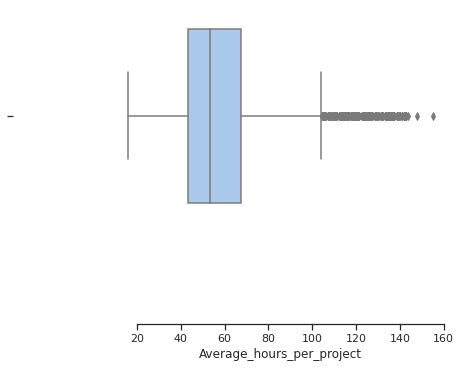

In [29]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x=df_clean["Average_hours_per_project"])
sns.despine(offset=100, trim=True)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

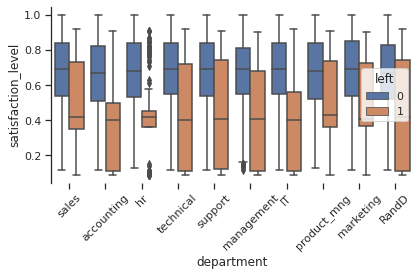

In [30]:
# Create a plot as needed
sns.boxplot(x=df_clean["department"], y=df_clean["satisfaction_level"], hue=df_clean["left"], palette="deep")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

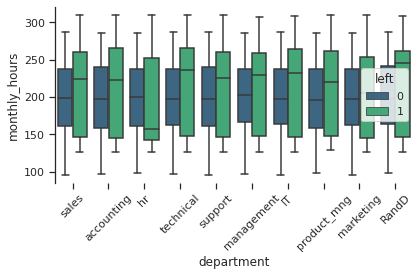

In [31]:
# Create a plot as needed
sns.boxplot(x=df_clean["department"], y=df_clean["monthly_hours"], hue=df_clean["left"], palette="viridis")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


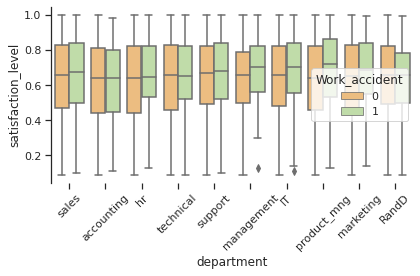

In [32]:
sns.boxplot(x=df_clean["department"], y=df_clean["satisfaction_level"], hue=df_clean["Work_accident"], palette="Spectral")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


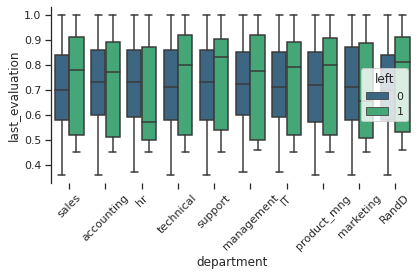

In [33]:
# Create a plot as needed
sns.boxplot(x=df_clean["department"], y=df_clean["last_evaluation"], hue=df_clean["left"], palette="viridis")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


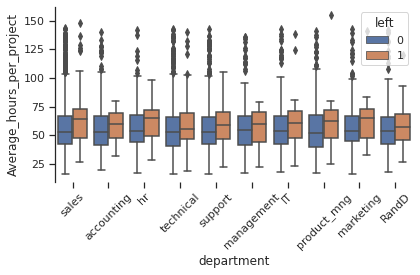

In [34]:
sns.boxplot(x=df_clean["department"], y=df_clean["Average_hours_per_project"], hue=df_clean["left"], palette="deep")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

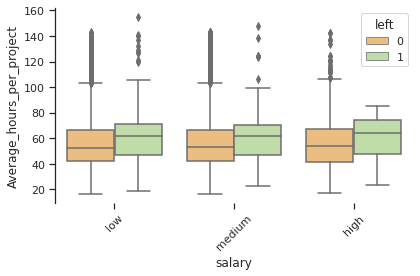

In [35]:
sns.boxplot(x=df_clean["salary"], y=df_clean["Average_hours_per_project"], hue=df_clean["left"], palette="Spectral")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

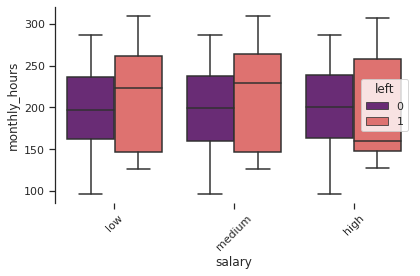

In [36]:
# Create a plot as needed
sns.boxplot(x=df_clean["salary"], y=df_clean["monthly_hours"], hue=df_clean["left"], palette="magma")
plt.xticks(rotation=45)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


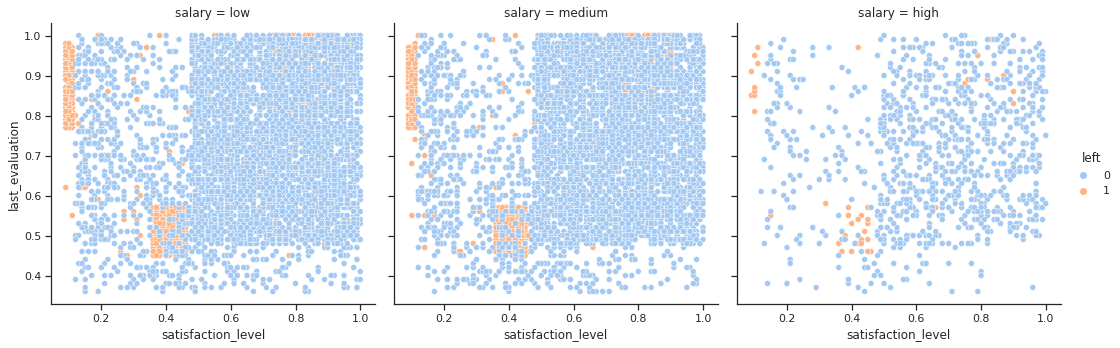

In [37]:
# Create a plot as needed
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="left", col="salary")


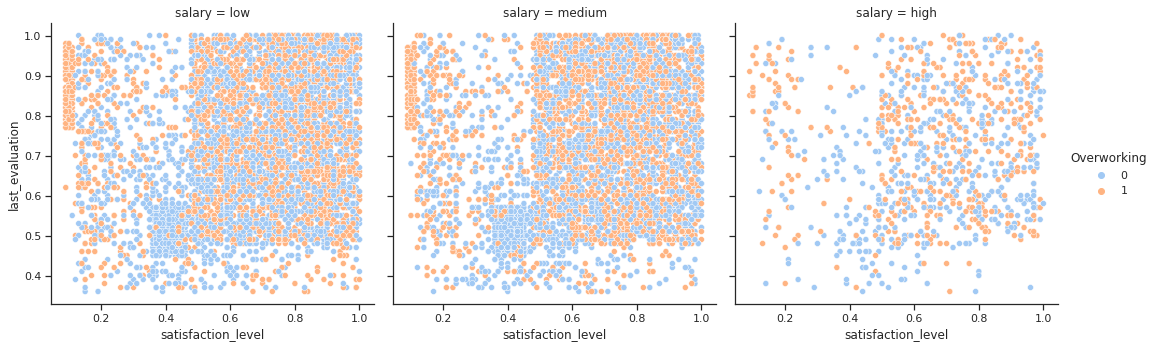

In [38]:
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="Overworking", col="salary")

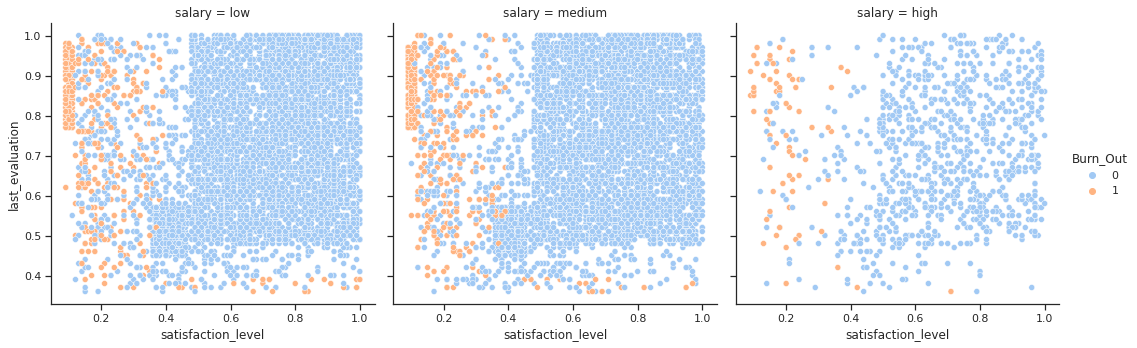

In [39]:
# Create a plot as needed
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="Burn_Out", col="salary")


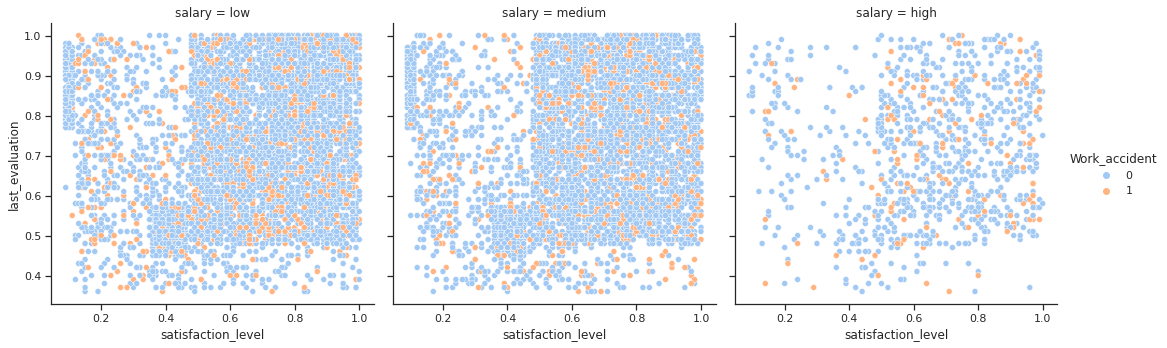

In [40]:
# Create a plot as needed
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="Work_accident", 
            col="salary")


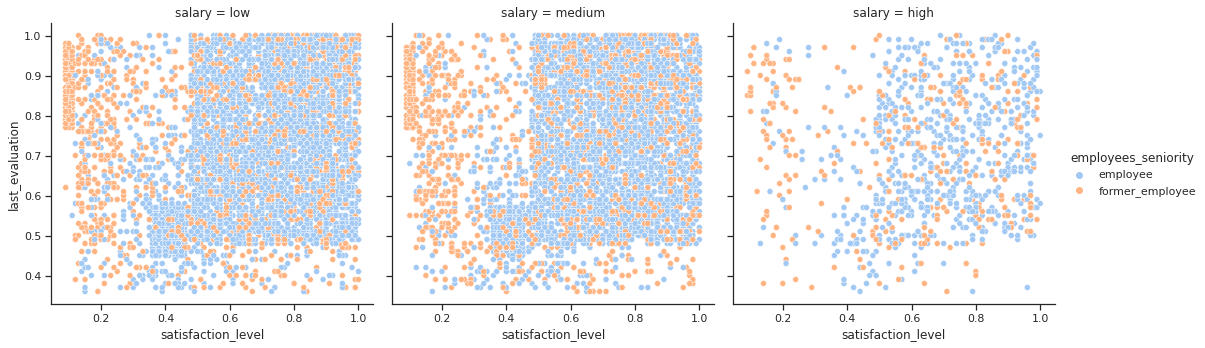

In [41]:
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="employees_seniority", 
            col="salary")

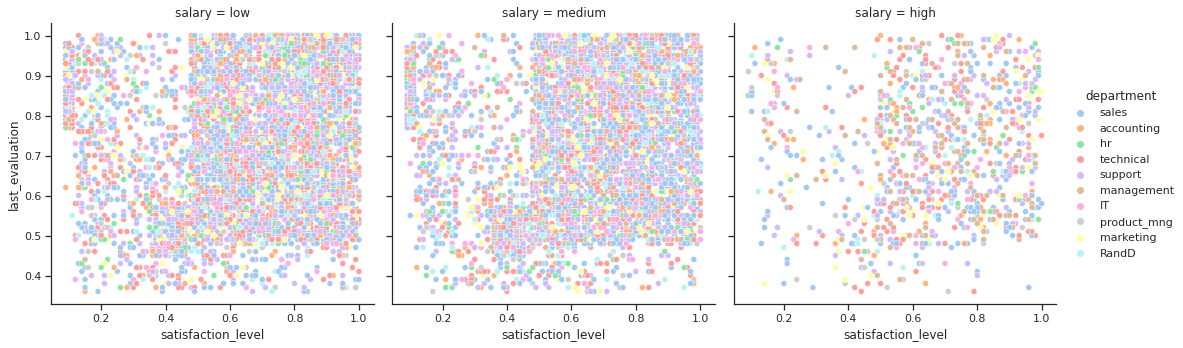

In [42]:
sns.relplot(data=df_clean, x="satisfaction_level", y="last_evaluation", hue="department", 
            col="salary")

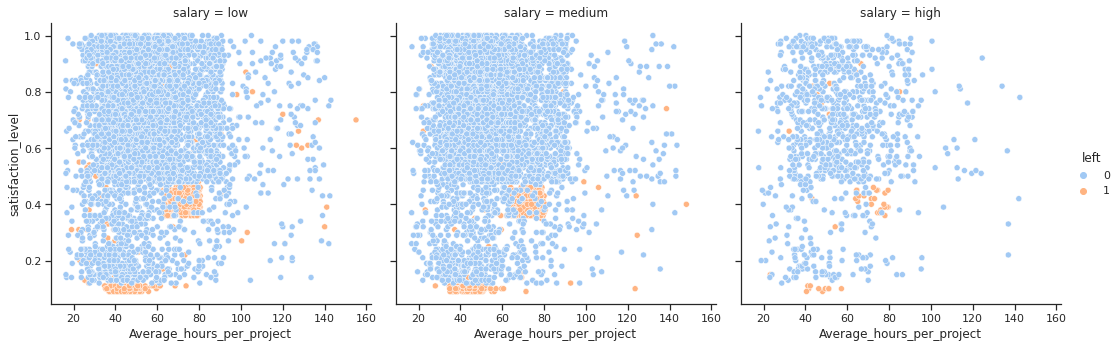

In [43]:
# Create a plot as needed
sns.relplot(data=df_clean, x="Average_hours_per_project", y="satisfaction_level", hue="left", 
            col="salary")


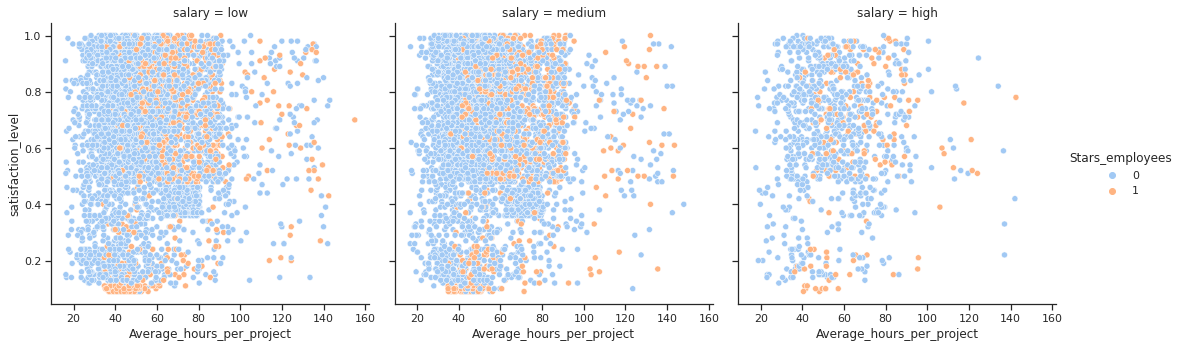

In [44]:
sns.relplot(data=df_clean, x="Average_hours_per_project", y="satisfaction_level", hue="Stars_employees", 
            col="salary")

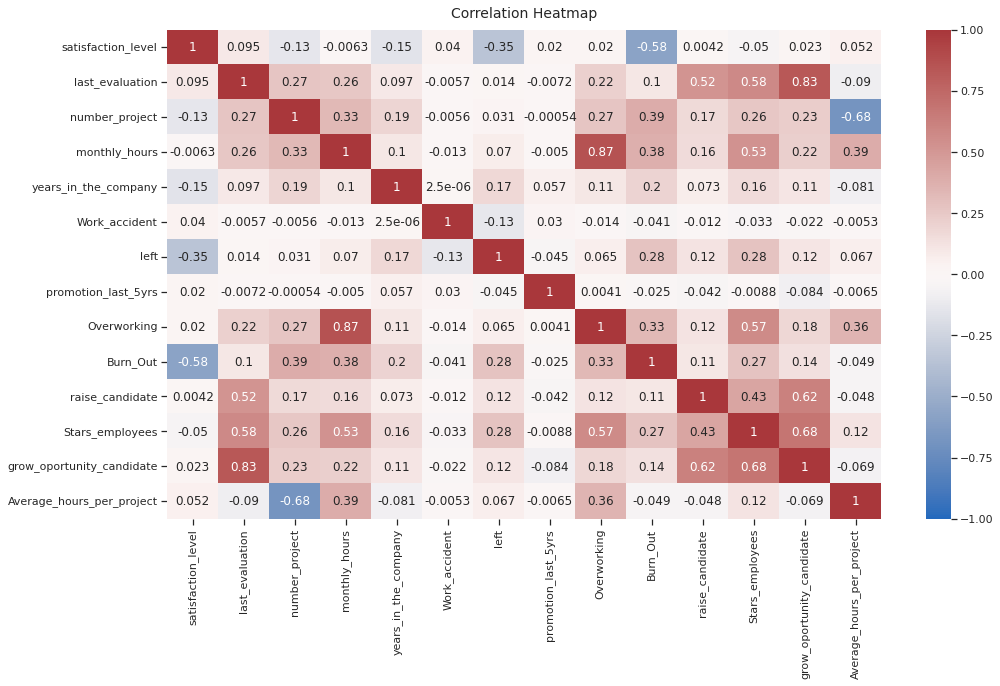

In [45]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_clean.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

The Burn_out, Stars_employees and satisfaction_level are some important variables that could help to predict correctly the employees who want to left the company

In [46]:
Left=df_clean[df_clean["left"]==1]
No_Left=df_clean[df_clean["left"]==0]


def Boostrapping_test(sample_1,sample_2,sample_size,column):
    counter=0
    for i in range(1000):
        sample=sample_1[column].sample(n=sample_size, replace=False, random_state=i)
        result=stats.ttest_ind(a=sample, b=sample_2[column], equal_var=False)
        if (result.pvalue<0.05):
            counter=counter+1
    print("BOOSTRAP RESULTS")
    print()
    print("The samples were different in the column:",column ,"at", (counter/10),"percent of the times")
    print()
    return(counter)

Boostrapping_test(No_Left,Left,1990,"satisfaction_level")
Boostrapping_test(No_Left,Left,1990,"monthly_hours")
Boostrapping_test(No_Left,Left,1990,"last_evaluation")                 


BOOSTRAP RESULTS

The samples were different in the column: satisfaction_level at 100.0 percent of the times

BOOSTRAP RESULTS

The samples were different in the column: monthly_hours at 100.0 percent of the times

BOOSTRAP RESULTS

The samples were different in the column: last_evaluation at 4.8 percent of the times



48

In [47]:
Low_sal=df_clean[df_clean["salary"]=="low"]
Med_sal=df_clean[df_clean["salary"]=="medium"]
High_sal=df_clean[df_clean["salary"]=="high"]
Gen_sal=df_clean[df_clean["salary"]!="high"]

result_satis=stats.ttest_ind(a=Low_sal["satisfaction_level"], b=Med_sal["satisfaction_level"], equal_var=False)
print("Satisfaction_level on Low and Medium salary: ", result_satis.pvalue)

result_hours=stats.ttest_ind(a=Low_sal["monthly_hours"], b=Med_sal["monthly_hours"], equal_var=False)
print("Monthly hours on Low and Medium salary: ",result_satis.pvalue)

result_eval=stats.ttest_ind(a=Low_sal["last_evaluation"], b=Med_sal["last_evaluation"], equal_var=False)
print("Last evaluation on Low and Medium salary: ",result_satis.pvalue)

Boostrapping_test(Gen_sal,High_sal,990,"satisfaction_level")
Boostrapping_test(Gen_sal,High_sal,990,"monthly_hours")
Boostrapping_test(Gen_sal,High_sal,990,"last_evaluation")


Satisfaction_level on Low and Medium salary:  0.008944793391929485
Monthly hours on Low and Medium salary:  0.008944793391929485
Last evaluation on Low and Medium salary:  0.008944793391929485
BOOSTRAP RESULTS

The samples were different in the column: satisfaction_level at 22.7 percent of the times

BOOSTRAP RESULTS

The samples were different in the column: monthly_hours at 0.8 percent of the times

BOOSTRAP RESULTS

The samples were different in the column: last_evaluation at 23.9 percent of the times



239

In [48]:
department_test=["sales","support"]
test=["technical"]
HR=df_clean[df_clean["department"]=="hr"]["satisfaction_level"]

print("Boostrapping test")
print("Using this test we want to prove if all the departments have the same satisfaction levels \n")
print("Results of the bootstrapping T test")
l=0
m=0
for department in department_test:
    j=0
    for i in range(100):
        sample=df_clean[df_clean["department"]==department]["satisfaction_level"].sample(n=960, replace=False, random_state=i)
        technical=df_clean[df_clean["department"]=="technical"]["satisfaction_level"].sample(n=960, replace=False, random_state=i)
        result=stats.ttest_ind(a=sample, b=technical, equal_var=False)
        if (result.pvalue<0.05):
            j=j+1
    if j>949:
        m=1
        test.append[department]
    if m<1:
        print("\nPercentage of times when the satisfaction level of the Department:",department)
        print("\nWas different compared with the technical department during bootstraping", j)
        
    for dep in test:
        k=0
        for i in range(100):
            sample=df_clean[df_clean["department"]==dep]["satisfaction_level"].sample(n=600, replace=False, random_state=i)
            final_result=stats.ttest_ind(a=sample, b=HR, equal_var=False)
            if(final_result.pvalue<0.05):
                k=k+1
   
    
    if k>94:
        l=1
        print("\n The department:",dep," has a different level of satisfaction")
        print("\n When we compared with the HR department we found is different ", k, "% percent of the times")
    if l<1:
        print("\n None of the departments were a significative difference between each other.")
        print("\n The results confirms no differences between departments on satisfaction level")
    
    

    


Boostrapping test
Using this test we want to prove if all the departments have the same satisfaction levels 

Results of the bootstrapping T test

Percentage of times when the satisfaction level of the Department: sales

Was different compared with the technical department during bootstraping 2

 None of the departments were a significative difference between each other.

 The results confirms no differences between departments on satisfaction level

Percentage of times when the satisfaction level of the Department: support

Was different compared with the technical department during bootstraping 3

 None of the departments were a significative difference between each other.

 The results confirms no differences between departments on satisfaction level


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [77]:
y_data=df_clean["left"]
X_data=df_clean.drop("left",axis=1)

In [78]:
dummies_col=["salary","department"]
X_data=pd.get_dummies(X_data, columns=dummies_col,drop_first=True,dtype=int)
drop_fin_col=["employees_seniority","Overworking","grow_oportunity_candidate"]
X_data=X_data.drop(drop_fin_col, axis=1)
X_data.head()

,satisfaction_level,last_evaluation,number_project,monthly_hours,years_in_the_company,Work_accident,promotion_last_5yrs,Burn_Out,raise_candidate,Stars_employees,Average_hours_per_project,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,78.500000,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,52.400000,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,1,38.857143,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,1,44.600000,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,79.500000,1,0,0,0,0,0,0,0,1,0,0


In [79]:
X_CV,X_final,y_cv,y_final=train_test_split(X_data,y_data,stratify=y_data, test_size=0.25,random_state=132)

X_train,X_test,y_train,y_test=train_test_split(X_CV,y_cv,stratify=y_cv,test_size=0.25,random_state=132)
sha
print("Validation dataset size: ", X_final.shape, y_final.pe)
print("Train dataset size: ", X_train.shape, y_train.shape)
print("Test dataset size: ", X_test.shape, y_test.shape)

Validation dataset size:  (2998, 22) (2998,)
Train dataset size:  (6744, 22) (6744,)
Test dataset size:  (2249, 22) (2249,)


In [80]:
Rf_model=RandomForestClassifier(random_state=132)

cv_params={
    "max_depth": [100,200,None],
    "max_features": [0.7],
    "max_samples": [0.5,0.7],
    "min_samples_leaf": [1,2],
    'min_samples_split': [3,5],
    'n_estimators': [300]    
}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf1 = GridSearchCV(Rf_model, cv_params, scoring=scoring, cv=4, refit='f1')

In [81]:
%%time
rf1.fit(X_train,y_train)

CPU times: user 2min 52s, sys: 0 ns, total: 2min 52s
Wall time: 2min 52s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=132,
                                 

In [82]:
rf1.best_score_

0.946251525791801

In [83]:
rf1.best_params_

{'max_depth': 100,
 'max_features': 0.7,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [84]:
def make_results(model_name:str, model_object, metric:str):
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [85]:
def get_test_scores(model_name:str, preds, y_test_data):
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [86]:
results = make_results('RF_CV',rf1,'f1')
results

,model,precision,recall,F1,accuracy
0,RF_CV,0.982737,0.9125,0.946252,0.9828


In [87]:
rf_predict = rf1.best_estimator_.predict(X_test)

rf_test_scores = get_test_scores('Random_Forest_test', rf_predict, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF_CV,0.982737,0.912500,0.946252,0.982800
0,Random_Forest_test,0.991202,0.906166,0.946779,0.983104


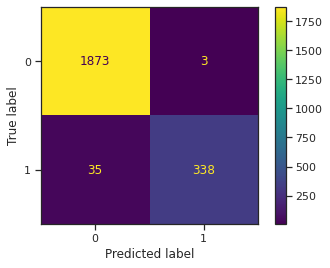

In [88]:
cm = metrics.confusion_matrix(y_test, rf_predict, labels=rf1.classes_)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

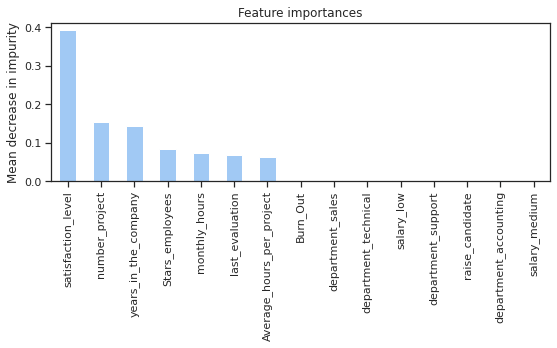

In [89]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In [90]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=132)

In [91]:
xgbcv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2]
             }
xgb1 = GridSearchCV(xgb_model, xgbcv_params, scoring=scoring, cv=4, refit='f1')

In [92]:
%%time
xgb1.fit(X_train,y_train)

CPU times: user 5min 37s, sys: 0 ns, total: 5min 37s
Wall time: 2min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=132,
                 

In [93]:
xgb1.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2}

In [94]:
xgb1.best_score_

0.9404915890979815

In [95]:
results = pd.concat([results,make_results('XGB_CV',xgb1,'f1')],axis=0)
results

,model,precision,recall,F1,accuracy
0,RF_CV,0.982737,0.912500,0.946252,0.982800
0,Random_Forest_test,0.991202,0.906166,0.946779,0.983104
0,XGB_CV,0.971471,0.911607,0.940492,0.980872


In [96]:
xgb_predict = xgb1.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGBoost_test', xgb_predict, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF_CV,0.982737,0.912500,0.946252,0.982800
0,Random_Forest_test,0.991202,0.906166,0.946779,0.983104
0,XGB_CV,0.971471,0.911607,0.940492,0.980872
0,XGBoost_test,0.991150,0.900804,0.943820,0.982214


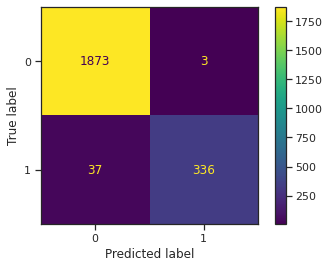

In [97]:
cm = metrics.confusion_matrix(y_test, xgb_predict, labels=rf1.classes_)

# Plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

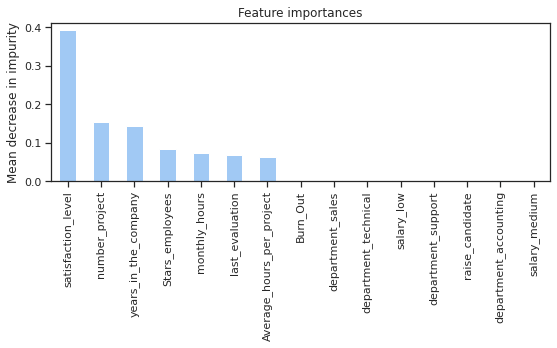

In [98]:
importances = xgb1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In [100]:
rf_predict_final = rf1.best_estimator_.predict(X_final)

rf_final_scores = get_test_scores('rf_final', rf_predict_final, y_final)
results = pd.concat([results, rf_final_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF_CV,0.982737,0.912500,0.946252,0.982800
0,Random_Forest_test,0.991202,0.906166,0.946779,0.983104
0,XGB_CV,0.971471,0.911607,0.940492,0.980872
0,XGBoost_test,0.991150,0.900804,0.943820,0.982214
0,rf_final,0.995690,0.927711,0.960499,0.987325


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



During the analysis not surprisily I detect that people who left have low levels of satisfaction. Moreover, I notice that workers who work a lot of hours and with a good evaluation are grouped in the employees who left the company. With that information i think that a satisfaction level, monthly hours and performance could be a good estimate also I include a categorical variable who detect those workers that work over the average and have good performance. In the construction stage i verified the level of correlation between variables and any varaible have a important correlation level. On the model constructed i put the independet variables encoded and i select the follow: "Salary","Monthly_hours","department","Number of projects", "Star_employee", "Number of years in company","Burn Out","last evaluation" and "satisfaction level". Finally on both models I constructed the random forest classifier and XGBoost Classifier the models peroforms well. Besides, its possible that a lot of variables could overfit a bit the models and make them more complex. Its possible that with less variable the performance still mantain a good performance. One of the Ethical considerations 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The type of model that best fits the objectives of the project are classifier models. Models such as logistic regression, Naive Bayes, Desicion Tree, Forest Tree Classifier and XGBoost Classifier are good choices for this task. In this particular case I will choose the Random Forest Classifier and XGBoost Classifier models. The reason why I did not select logistic regression is because the Decision Tree is a model that tends to over-fit the data, besides being very good at predicting outcomes it is very sensitive to the tuned hyperparameters. In this type of data the employees that left are a subsample being 18% of the data. The overfitting of this model is not only difficult to detect but the possible bias that the model might have could be amplified by a depedent subsample and fit the results very well simply because of the subsample and not because it correctly detects the employees who left the companies. This problem could be rectified with the random forest, the bagging version of the decision tree.


### Identify the types of models most appropriate for this task.

Random Forest Classifier, XGBoost Classifier and logistic regression

### Modeling

Add as many cells as you need to conduct the modeling process.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The questions were answered in the paragraphs below.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Both the Random Forest and XGBoost models performed well, both having a value greater than 0.98 on measures such as precision and accuracy in the validation and pretest tests. However, it should be taken into account that these two variables are expected to have high values due to the low representation in the data of employees who left the company (18%), so in this evaluation greater relevance was given to the values of F1, being the harmonic mean of the models, and the value of Recall which tends to decrease in models built with data with a lower representation of the dependent variable.

The model chosen as champion is the Random Forest model, performing better than the XGBoost model in the Recall and F1 variables.
Not to mention, this model has lower complexity due to the nature of the model and higher interpretability. It is worth mentioning that both models used a total of 22 variables (after coding certain variables), so their interpretability and complexity can make interpretation difficult. If in the future we seek to improve this model using the current data, I would recommend eliminating some of the variables such as: ‘Average_hours_per_project’, ‘raise_candidate’, ‘promotion_last_5yrs’. Decreasing the complexity and increasing the interpretability of the data. These changes in the models are not expected to change the results obtained because these variables do not have an important component in the predictive power of our model.

According to the results obtained with both models (Random Forest model and XGBoost) I find, as expected, that the level of satisfaction is the most important variable in determining whether employees will decide to leave the company. On the other hand, variables such as working time, number of projects, time working in the company and whether the employee is an active talent in the company also seem to have a relevant weight in an employee's decision to leave.  Although these models, due to their black box nature, cannot tell us information about the exact relationship and magnitude in which these variables influence attrition. They do indicate the relevant variables to reduce this problem.


### Conclusion, Recommendations, Next Steps

The strategies I suggest according to the results obtained with the models and the analysis:
Organise and maintain control on the number of projects that employees may be involved in.
- Increasing incentives and promotion for employees who have a period of 3 to 4 years. 
- Implement a reward scheme that is proportional to the outstanding results and performance of employees and not to the hours worked. 
- Re-evaluate the evaluation criteria so that longer working hours are not synonymous with good performance. 
- Ask questions within the internal employee satisfaction evaluation about their work experience within the period in which the evaluation is carried out, objectives within the company. Finally, these data are evaluated and discussed in order to make changes to the work culture if necessary.
- Inform employees, in case they are not familiar with it, about the work policies on the job explicitly. This is to avoid different expectations of workers once they are part of the company.



Finally, it would be necessary as a continuation of this project to further evaluate why time within the company is a reason for attrition, with people within a period of 4 years or less being the main group affected. During the completion of this work I declare no ethical conflict and undertake not to share or disseminate the results other than for the original project objectives to the relevant persons within the project.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.